<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400>
<h1 align=center><font size = 5>Hacktiv8 PTP Introduction to Data Science Projects 2 // Statistical Treatment for Datasets</font></h1>

Title: Hacktiv8 PTP Introduction to Data Science Projects 2: Statistical Treatment for Datasets Starter Notebook\
This Assigment is made by Mohamad Syaipul Anwar

## NYC Property Sales Introduction

NYC Property merupakan dataset yang berisi catatan setiap bangunan atau unit bangunan (apartemen, dll.) yang dijual di pasar properti Kota New York selama periode 12 bulan.

Dataset ini berisi tentang lokasi, alamat, jenis, harga jual, dan tanggal penjualan unit bangunan yang terjual. ada beberapa istilah yang terdapat pada dataset ini, antara lain:

* `BOROUGH`: Kode digit untuk wilayah tempat properti berada; dalam urutan ini adalah Manhattan (1), Bronx (2), Brooklyn (3), Queens (4), dan Staten Island (5).
* `BLOK`; `LOT`: Kombinasi wilayah , block, dan lot yang membentuk kunci unik untuk properti di New York City. Biasa disebut BBL.
* `BUILDING CLASS AT PRESENT` dan `BUILDING CLASS AT SALE OF SALE`: Jenis bangunan pada berbagai titik waktu.

## Data Preparation

In [1]:
# Import Library
import math
import statistics
import numpy as np
import scipy
import scipy.stats
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [2]:
# Load dataset
df = pd.read_csv('nyc-rolling-sales.csv')
print ('Data read into a pandas dataframe!')

Data read into a pandas dataframe!


Melihat 5 baris teratas dari kumpulan data

In [3]:
# Write your syntax here
df.head()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,,C2,153 AVENUE B,...,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,5,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,,C7,234 EAST 4TH STREET,...,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,6,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,,C7,197 EAST 3RD STREET,...,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,7,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,,C4,154 EAST 7TH STREET,...,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,8,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,,C2,301 EAST 10TH STREET,...,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Melihat 5 baris terbawah dari kumpulan data

In [4]:
# Write your syntax here
df.tail()

,Unnamed: 0,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,EASE-MENT,BUILDING CLASS AT PRESENT,ADDRESS,...,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
84543,8409,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,34,,B9,37 QUAIL LANE,...,2,0,2,2400,2575,1998,1,B9,450000,2016-11-28 00:00:00
84544,8410,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7349,78,,B9,32 PHEASANT LANE,...,2,0,2,2498,2377,1998,1,B9,550000,2017-04-21 00:00:00
84545,8411,5,WOODROW,02 TWO FAMILY DWELLINGS,1,7351,60,,B2,49 PITNEY AVENUE,...,2,0,2,4000,1496,1925,1,B2,460000,2017-07-05 00:00:00
84546,8412,5,WOODROW,22 STORE BUILDINGS,4,7100,28,,K6,2730 ARTHUR KILL ROAD,...,0,7,7,208033,64117,2001,4,K6,11693337,2016-12-21 00:00:00
84547,8413,5,WOODROW,35 INDOOR PUBLIC AND CULTURAL FACILITIES,4,7105,679,,P9,155 CLAY PIT ROAD,...,0,1,1,10796,2400,2006,4,P9,69300,2016-10-27 00:00:00


Melihat dimensi dari dataframe

In [5]:
# Write your syntax here
df.shape

(84548, 22)

Dari dimensi yang ditampikan, kita dapat memgetahui bahwa datset ini memiliki 84548 baris dan 22 kolom

## Data Cleaning

In [6]:
# Drop 'Unnamed: 0' and 'EASE-MENT' features using .drop function
df = df.drop(columns=['Unnamed: 0', 'EASE-MENT'])
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633,6440,1900,2,C2,6625000,2017-07-19 00:00:00
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616,18690,1900,2,C7,-,2016-12-14 00:00:00
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212,7803,1900,2,C7,-,2016-12-09 00:00:00
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272,6794,1913,2,C4,3936272,2016-09-23 00:00:00
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369,4615,1900,2,C2,8000000,2016-11-17 00:00:00


Melihat type data dari setiap kolom

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   BOROUGH                         84548 non-null  int64 
 1   NEIGHBORHOOD                    84548 non-null  object
 2   BUILDING CLASS CATEGORY         84548 non-null  object
 3   TAX CLASS AT PRESENT            84548 non-null  object
 4   BLOCK                           84548 non-null  int64 
 5   LOT                             84548 non-null  int64 
 6   BUILDING CLASS AT PRESENT       84548 non-null  object
 7   ADDRESS                         84548 non-null  object
 8   APARTMENT NUMBER                84548 non-null  object
 9   ZIP CODE                        84548 non-null  int64 
 10  RESIDENTIAL UNITS               84548 non-null  int64 
 11  COMMERCIAL UNITS                84548 non-null  int64 
 12  TOTAL UNITS                     84548 non-null

In [8]:
#let's check which columns should be categorical
print('Column name')
for col in df.columns:
    if df[col].dtype=='object':
        print(col, df[col].nunique())

Column name
NEIGHBORHOOD 254
BUILDING CLASS CATEGORY 47
TAX CLASS AT PRESENT 11
BUILDING CLASS AT PRESENT 167
ADDRESS 67563
APARTMENT NUMBER 3989
LAND SQUARE FEET 6062
GROSS SQUARE FEET 5691
BUILDING CLASS AT TIME OF SALE 166
SALE PRICE 10008
SALE DATE 364


In [9]:
# LAND SQUARE FEET,GROSS SQUARE FEET, SALE PRICE, BOROUGH should be numeric. 
# SALE DATE datetime format.
# categorical: NEIGHBORHOOD, BUILDING CLASS CATEGORY, TAX CLASS AT PRESENT, BUILDING CLASS AT PRESENT,
# BUILDING CLASS AT TIME OF SALE, TAX CLASS AT TIME OF SALE,BOROUGH 

numer = ['LAND SQUARE FEET','GROSS SQUARE FEET', 'SALE PRICE', 'BOROUGH']
for col in numer: # coerce for missing values
    df[col] = pd.to_numeric(df[col], errors='coerce')

categ = ['NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'BUILDING CLASS AT TIME OF SALE', 'TAX CLASS AT TIME OF SALE']
for col in categ:
    df[col] = df[col].astype('category')

df['SALE DATE'] = pd.to_datetime(df['SALE DATE'], errors='coerce')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84548 entries, 0 to 84547
Data columns (total 20 columns):
 #   Column                          Non-Null Count  Dtype         
---  ------                          --------------  -----         
 0   BOROUGH                         84548 non-null  int64         
 1   NEIGHBORHOOD                    84548 non-null  category      
 2   BUILDING CLASS CATEGORY         84548 non-null  category      
 3   TAX CLASS AT PRESENT            84548 non-null  category      
 4   BLOCK                           84548 non-null  int64         
 5   LOT                             84548 non-null  int64         
 6   BUILDING CLASS AT PRESENT       84548 non-null  category      
 7   ADDRESS                         84548 non-null  object        
 8   APARTMENT NUMBER                84548 non-null  object        
 9   ZIP CODE                        84548 non-null  int64         
 10  RESIDENTIAL UNITS               84548 non-null  int64         
 11  CO

Setelah itu, dilakukan pengecekan 'missing value' dari dataset

In [11]:
missing = df.isnull().sum()/len(df)*100

print(pd.DataFrame([missing[missing>0],pd.Series(df.isnull().sum()[df.isnull().sum()>1000])], index=['percent missing','how many missing']))

                  LAND SQUARE FEET  GROSS SQUARE FEET   SALE PRICE
percent missing          31.049818          32.658372     17.22217
how many missing      26252.000000       27612.000000  14561.00000


Sekitar 30% data dari 'GROSS SF' 'dan LAND SF' hilang. selain itu, sekitar 17% dari 'SALE PRICE' juga hilang.

Kita dapat mengisi nilai yang hilang dari satu kolom ke kolom lainnya, yang akan membantu kita mengurangi nilai yang hilang.

In [12]:
print(df[(df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull())].shape)
print(df[(df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull())].shape)

(6, 20)
(1366, 20)


Ada 1372 baris yang dapat diisi dengan nilai perkiraannya.

In [13]:
df['LAND SQUARE FEET'] = df['LAND SQUARE FEET'].mask((df['LAND SQUARE FEET'].isnull()) & (df['GROSS SQUARE FEET'].notnull()), df['GROSS SQUARE FEET'])
df['GROSS SQUARE FEET'] = df['GROSS SQUARE FEET'].mask((df['LAND SQUARE FEET'].notnull()) & (df['GROSS SQUARE FEET'].isnull()), df['LAND SQUARE FEET'])

In [14]:
#  Check for duplicates before
print(sum(df.duplicated()))
df[df.duplicated(keep=False)].sort_values(['NEIGHBORHOOD', 'ADDRESS']).head()

765


,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
76286,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76287,5,ANNADALE,02 TWO FAMILY DWELLINGS,1,6350,7,B2,106 BENNETT PLACE,,10312,2,0,2,8000.0,4208.0,1985,1,B2,NaN,2017-06-27
76322,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76323,5,ANNADALE,05 TAX CLASS 1 VACANT LAND,1B,6459,28,V0,N/A HYLAN BOULEVARD,,0,0,0,0,6667.0,6667.0,0,1,V0,NaN,2017-05-11
76383,5,ARDEN HEIGHTS,01 ONE FAMILY DWELLINGS,1,5741,93,A5,266 ILYSSA WAY,,10312,1,0,1,500.0,1354.0,1996,1,A5,320000.0,2017-06-06


pada dataframe ini memiliki 765 baris duplikat, selanjutnya akan dilakukan pembersihan data duplikat.

In [15]:
df.drop_duplicates(inplace=True)

print(sum(df.duplicated()))

0


## Exploratory Data Analysis (EDA)

#### Mengecek ulang dataset

In [16]:
df.head()

,BOROUGH,NEIGHBORHOOD,BUILDING CLASS CATEGORY,TAX CLASS AT PRESENT,BLOCK,LOT,BUILDING CLASS AT PRESENT,ADDRESS,APARTMENT NUMBER,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,TAX CLASS AT TIME OF SALE,BUILDING CLASS AT TIME OF SALE,SALE PRICE,SALE DATE
0,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,392,6,C2,153 AVENUE B,,10009,5,0,5,1633.0,6440.0,1900,2,C2,6625000.0,2017-07-19
1,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,26,C7,234 EAST 4TH STREET,,10009,28,3,31,4616.0,18690.0,1900,2,C7,NaN,2016-12-14
2,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2,399,39,C7,197 EAST 3RD STREET,,10009,16,1,17,2212.0,7803.0,1900,2,C7,NaN,2016-12-09
3,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2B,402,21,C4,154 EAST 7TH STREET,,10009,10,0,10,2272.0,6794.0,1913,2,C4,3936272.0,2016-09-23
4,1,ALPHABET CITY,07 RENTALS - WALKUP APARTMENTS,2A,404,55,C2,301 EAST 10TH STREET,,10009,6,0,6,2369.0,4615.0,1900,2,C2,8000000.0,2016-11-17


In [17]:
df.shape

(83783, 20)

Sekarang, mari kita dapatkan statistik deskriptif sederhana dengan fungsi`.describe()` untuk fitur `COMMERCIAL UNITS`.

In [18]:
df[df['COMMERCIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,78777.000000,78777.000000,78777.000000,78777.000000,78777.000000,78777.0,78777.000000,5.278000e+04,5.278000e+04,78777.000000,6.562900e+04
mean,3.004329,4273.781015,395.422420,10722.737068,1.691737,0.0,1.724133,3.140140e+03,2.714612e+03,1781.065451,9.952969e+05
std,1.298594,3589.241940,671.604654,1318.493961,9.838994,0.0,9.835016,2.929999e+04,2.791294e+04,551.024570,3.329268e+06
min,1.000000,1.000000,1.000000,0.000000,0.000000,0.0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,2.000000,1330.000000,23.000000,10304.000000,0.000000,0.0,1.000000,1.600000e+03,9.750000e+02,1920.000000,2.400000e+05
50%,3.000000,3340.000000,52.000000,11209.000000,1.000000,0.0,1.000000,2.295000e+03,1.600000e+03,1940.000000,5.294900e+05
75%,4.000000,6361.000000,1003.000000,11357.000000,2.000000,0.0,2.000000,3.300000e+03,2.388000e+03,1967.000000,9.219560e+05
max,5.000000,16322.000000,9106.000000,11694.000000,889.000000,0.0,889.000000,4.252327e+06,4.252327e+06,2017.000000,3.450000e+08


<font color="tomato">**Insight:**

<font color="white">
Tabel di atas menunjukkan statistik deskriptif yang berisi:

- Ada kode pos dengan nilai 0
- Kolom lain memiliki outlier yang perlu diselidiki lebih lanjut.
- Kolom tahun memiliki tahun dengan 0
- Sebagian besar harga jual kurang dari 10.000

Selanjutnya, kita dapatkan statistik deskriptif sederhana dengan fungsi `.describe()` untuk fitur `RESIDENTIAL UNITS`.

In [19]:
df[df['RESIDENTIAL UNITS']==0].describe()

,BOROUGH,BLOCK,LOT,ZIP CODE,RESIDENTIAL UNITS,COMMERCIAL UNITS,TOTAL UNITS,LAND SQUARE FEET,GROSS SQUARE FEET,YEAR BUILT,SALE PRICE
count,24546.000000,24546.000000,24546.000000,24546.000000,24546.0,24546.000000,24546.000000,9.503000e+03,9.503000e+03,24546.000000,2.085500e+04
mean,2.542084,3355.267172,283.943412,10321.514626,0.0,0.459382,0.563350,7.416797e+03,8.870466e+03,1675.525788,1.632257e+06
std,1.334486,3091.222257,570.045258,2135.406385,0.0,15.826020,15.825945,8.032892e+04,7.890877e+04,679.095000,1.969307e+07
min,1.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000e+00
25%,1.000000,1158.000000,12.000000,10023.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1921.000000,1.825000e+05
50%,3.000000,1947.000000,38.000000,11004.000000,0.0,0.000000,0.000000,0.000000e+00,0.000000e+00,1950.000000,3.950000e+05
75%,4.000000,5390.750000,135.000000,11354.000000,0.0,0.000000,0.000000,3.250000e+03,2.500000e+03,1962.000000,8.500000e+05
max,5.000000,16317.000000,9056.000000,11694.000000,0.0,2261.000000,2261.000000,4.252327e+06,4.252327e+06,2017.000000,2.210000e+09


<font color="tomato"> **Insight:**
    
<font color = "white">
Tabel di atas menunjukkan statistik deskriptif yang berisi:

- Rata-rata unit yang terjual adalah 2 unit
- Kolom lain juga memiliki outlier yang perlu diselidiki lebih lanjut.
- Kolom tahun memiliki tahun dengan 0
- Sebagian besar harga jual kurang dari 10.000

Menghitung nilai total fitur `BOROUGH`.

In [20]:
# Write your syntax below
df['BOROUGH'].value_counts()

4    26548
3    23843
1    18102
5     8296
2     6994
Name: BOROUGH, dtype: int64

#### Mean()

In [21]:
#taking list of categorical features
cat_columns = ['BOROUGH', 'NEIGHBORHOOD', 'BUILDING CLASS CATEGORY', 'TAX CLASS AT PRESENT', 'BUILDING CLASS AT PRESENT', 'ZIP CODE', 'YEAR BUILT', 'TAX CLASS AT TIME OF SALE', 'BUILDING CLASS AT TIME OF SALE']
#taking list of numerical features
num_columns = ['RESIDENTIAL UNITS', 'COMMERCIAL UNITS', 'TOTAL UNITS', 'LAND SQUARE FEET', 'GROSS SQUARE FEET', 'SALE PRICE']

Melihat 'Mean' dari beberapa kolom

In [22]:
#mean from all numeric columns
for column in num_columns:
    mean = df[column].mean()
    print('Mean from ' + column + ' in NYC is', mean)

Mean from RESIDENTIAL UNITS in NYC is 1.9999761288089468
Mean from COMMERCIAL UNITS in NYC is 0.18367687955790554
Mean from TOTAL UNITS in NYC is 2.213503932778726
Mean from LAND SQUARE FEET in NYC is 3857.3262548931307
Mean from GROSS SQUARE FEET in NYC is 4206.653514393598
Mean from SALE PRICE in NYC is 1280703.0003016938


Melihat 'Mean' dari harga penjualan

In [23]:
df["SALE PRICE"].mean()
mps = df.groupby(["BOROUGH"]) \
      .agg(mean_saleprice = pd.NamedAgg("SALE PRICE", np.mean)) \
      .reset_index()

mps

,BOROUGH,mean_saleprice
0,1,3.344642e+06
1,2,5.946771e+05
2,3,8.410834e+05
3,4,7.388827e+05
4,5,5.436113e+05


<font color="tomato"> **Insight:**
    
<font color = "white">
Tabel di atas menunjukkan statistik deskriptif yang berisi:

- Borough 3 memiliki harga jual rata-rata lebih tinggi daripada rata-rata semua borough
- Di antara 5 borough, Borough 1 memiliki harga jual rata-rata terkecil

### Median()

In [24]:
#median from all numeric columns
for column in num_columns:
    median = df[column].median()
    print('Median from ' + column + ' in NYC is', median)

Median from RESIDENTIAL UNITS in NYC is 1.0
Median from COMMERCIAL UNITS in NYC is 0.0
Median from TOTAL UNITS in NYC is 1.0
Median from LAND SQUARE FEET in NYC is 2315.0
Median from GROSS SQUARE FEET in NYC is 1700.0
Median from SALE PRICE in NYC is 533000.0


In [25]:
# Median of properties price in the data
df["SALE PRICE"].median()

533000.0

In [26]:
medianprice = df.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(med_saleprice = pd.NamedAgg("SALE PRICE", np.median)) \
      .reset_index()

medianprice.sort_values(by="med_saleprice")

,BUILDING CLASS CATEGORY,med_saleprice
46,49 CONDO WAREHOUSES/FACTORY/INDUS,0.0
45,48 CONDO TERRACES/GARDENS/CABANAS,0.0
38,41 TAX CLASS 4 - OTHER,0.0
16,16 CONDOS - 2-10 UNIT WITH COMMERCIAL UNIT,0.0
41,44 CONDO PARKING,0.0
18,18 TAX CLASS 3 - UNTILITY PROPERTIES,0.0
44,47 CONDO NON-BUSINESS STORAGE,0.0
5,06 TAX CLASS 1 - OTHER,0.0
36,39 TRANSPORTATION FACILITIES,110000.0
4,05 TAX CLASS 1 VACANT LAND,112007.0


<font color="tomato"> **Insight:**
    

<font color = "white">Dari tabel diatas dapat diketahui:

- Median harga jual properti adalah 533.000
- beberapa kategori bangunan memiliki median harga jual lebih rendah dari median harga jual
- Kategori "THEATRES" dan "LUXURY HOTELS" memiliki median harga yang signifikan di antara kategori lainnya
    

### Modus()

In [27]:
#modus from all categorical columns
for column in cat_columns:
    mode = df[column].mode()
    print(mode[0],'is',column,'with the most deals in NYC')

4 is BOROUGH with the most deals in NYC
FLUSHING-NORTH is NEIGHBORHOOD with the most deals in NYC
01 ONE FAMILY DWELLINGS                     is BUILDING CLASS CATEGORY with the most deals in NYC
1 is TAX CLASS AT PRESENT with the most deals in NYC
D4 is BUILDING CLASS AT PRESENT with the most deals in NYC
10314 is ZIP CODE with the most deals in NYC
0 is YEAR BUILT with the most deals in NYC
1 is TAX CLASS AT TIME OF SALE with the most deals in NYC
R4 is BUILDING CLASS AT TIME OF SALE with the most deals in NYC


In [28]:
# Modus of borough in all data
df["BOROUGH"].mode()

0    4
dtype: int64

In [29]:
# Mode of borough in each building class category
modus = df.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(mod_borough = pd.NamedAgg("BOROUGH", scipy.stats.mode)) \
      .reset_index()

modus.sort_values(by="mod_borough")

,BUILDING CLASS CATEGORY,mod_borough
37,40 SELECTED GOVERNMENTAL FACILITIES,"([1], [1])"
10,11 SPECIAL CONDO BILLING LOTS,"([1], [1])"
31,34 THEATRES,"([1], [8])"
33,36 OUTDOOR RECREATIONAL FACILITIES,"([1], [9])"
22,25 LUXURY HOTELS,"([1], [11])"
25,28 COMMERCIAL CONDOS,"([1], [13])"
21,23 LOFT BUILDINGS,"([1], [36])"
23,26 OTHER HOTELS,"([1], [57])"
43,46 CONDO STORE BUILDINGS,"([1], [80])"
19,21 OFFICE BUILDINGS,"([1], [106])"


<font color="tomato"> **Insight:**
    

<font color = "white">Dari tabel diastas dapat diketahui:

- Modus borough di semua data adalah Borough 4
- Kebanyakan borough yang menjadi modus di setiap kategori 'building' adalah Borough 3
- hanya 5 kategori 'building' yang memiliki Borough 4 sebagai modusnya

### Range()

In [30]:
#range from all numeric columns
for column in num_columns:
    minimum = df[column].min()
    maximum = df[column].max()
    the_range = maximum - minimum
    print('minimum of',column,'in NYC is',minimum)
    print('maximum of',column,'in NYC is',maximum)
    print('range of',column,'is',the_range,'\n')

minimum of RESIDENTIAL UNITS in NYC is 0
maximum of RESIDENTIAL UNITS in NYC is 1844
range of RESIDENTIAL UNITS is 1844 

minimum of COMMERCIAL UNITS in NYC is 0
maximum of COMMERCIAL UNITS in NYC is 2261
range of COMMERCIAL UNITS is 2261 

minimum of TOTAL UNITS in NYC is 0
maximum of TOTAL UNITS in NYC is 2261
range of TOTAL UNITS is 2261 

minimum of LAND SQUARE FEET in NYC is 0.0
maximum of LAND SQUARE FEET in NYC is 4252327.0
range of LAND SQUARE FEET is 4252327.0 

minimum of GROSS SQUARE FEET in NYC is 0.0
maximum of GROSS SQUARE FEET in NYC is 4252327.0
range of GROSS SQUARE FEET is 4252327.0 

minimum of SALE PRICE in NYC is 0.0
maximum of SALE PRICE in NYC is 2210000000.0
range of SALE PRICE is 2210000000.0 



In [31]:
# Exclude null sale price
df_range = df.loc[df["SALE PRICE"].notnull(), :]
df_range = df_range.loc[df_range["SALE PRICE"]!=0, :]

In [32]:
# Range of properties price in each borough
range = df_range.groupby(["BOROUGH"]) \
    .agg(range_saleprice = pd.NamedAgg("SALE PRICE", np.ptp)) \
    .reset_index()

range.sort_values(by="range_saleprice")

,BOROUGH,range_saleprice
1,2,1.100000e+08
4,5,1.220000e+08
3,4,2.575000e+08
2,3,3.450000e+08
0,1,2.210000e+09


<font color="tomato"> **Notes:**
    

<font color = "white">Dari tabel dapat kita ketahui:

- Borough 1 memiliki kisaran harga jual tertinggi

### Variance()

In [33]:
#varian from all numeric columns
for column in num_columns:
    variance = df[column].var()
    print('Variance from ' + column + ' in NYC is', variance)

Variance from RESIDENTIAL UNITS in NYC is 274.53567592005
Variance from COMMERCIAL UNITS in NYC is 73.55776176857175
Variance from TOTAL UNITS in NYC is 352.6030274003604
Variance from LAND SQUARE FEET in NYC is 1726133087.8136096
Variance from GROSS SQUARE FEET in NYC is 1772153492.136674
Variance from SALE PRICE in NYC is 130653226969348.88


In [34]:
# Variance of properties price in each borough
variance = df_range.groupby(["BOROUGH"]) \
      .agg(var_saleprice = pd.NamedAgg("SALE PRICE", np.var)) \
      .reset_index()

variance.sort_values(by="var_saleprice")

,BOROUGH,var_saleprice
4,5,3.631100e+12
1,2,1.039236e+13
3,4,1.041624e+13
2,3,2.322026e+13
0,1,5.827628e+14


<font color="tomato"> **Insight:**
    

<font color = "white">dari data ini dapat diketahui:

- Borough 1 memiliki varian harga jual tertinggi
- Borough 2 memiliki varian harga jual terendah

### Standar Deviation

In [35]:
#SD from all numeric columns
for column in num_columns:
    stdev = df[column].std()
    print('Standard Deviation from ' + column + ' in NYC is', stdev)

Standard Deviation from RESIDENTIAL UNITS in NYC is 16.569118139480146
Standard Deviation from COMMERCIAL UNITS in NYC is 8.576582172903828
Standard Deviation from TOTAL UNITS in NYC is 18.77772689652186
Standard Deviation from LAND SQUARE FEET in NYC is 41546.75784960374
Standard Deviation from GROSS SQUARE FEET in NYC is 42096.95347809238
Standard Deviation from SALE PRICE in NYC is 11430364.253572538


In [36]:
# Standard deviation of properties price in each building class category
sd = df_range.groupby(["BUILDING CLASS CATEGORY"]) \
      .agg(std_saleprice = pd.NamedAgg("SALE PRICE", np.std)) \
      .reset_index()

sd.sort_values(by="std_saleprice")

,BUILDING CLASS CATEGORY,std_saleprice
46,49 CONDO WAREHOUSES/FACTORY/INDUS,5.734518e+03
44,47 CONDO NON-BUSINESS STORAGE,6.876000e+04
45,48 CONDO TERRACES/GARDENS/CABANAS,4.832778e+05
12,12 CONDOS - WALKUP APARTMENTS,5.077361e+05
3,04 TAX CLASS 1 CONDOS,5.842417e+05
5,06 TAX CLASS 1 - OTHER,6.348076e+05
1,02 TWO FAMILY DWELLINGS,8.829285e+05
0,01 ONE FAMILY DWELLINGS,9.801897e+05
2,03 THREE FAMILY DWELLINGS,1.033324e+06
8,09 COOPS - WALKUP APARTMENTS,1.066299e+06


### Distribution

In [37]:
# Create dataset for specific range of sale price
df_dis = df_range[df_range["SALE PRICE"] < 5E6]

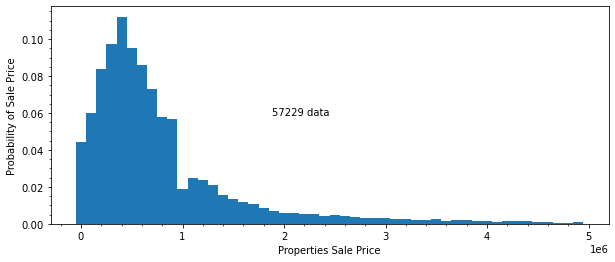

In [38]:
%matplotlib inline
H, edges = np.histogram(df_dis["SALE PRICE"], bins=50)

plt.figure(figsize=(10, 4))
ax = plt.subplot(111)
ax.bar(edges[:-1], H / float(sum(H)), width=edges[1] - edges[0])
ax.text(0.5, 0.5, "%g data" % len(df_dis),
        horizontalalignment="right", transform=ax.transAxes)
ax.set_xlabel("Properties Sale Price")
ax.set_ylabel("Probability of Sale Price")
ax.minorticks_on()
plt.show()

Dari plot distribusi di atas, kita mengetahui bahwa distribusi Harga Jual tidak normal.

### Confidence Interval

In [39]:
df.groupby('BOROUGH').aggregate({"SALE PRICE":[np.mean,np.std,np.size]})

SALE PRICE                     
                 mean           std   size
BOROUGH                                   
1        3.344642e+06  2.414048e+07  18102
2        5.946771e+05  2.793509e+06   6994
3        8.410834e+05  3.951912e+06  23843
4        7.388827e+05  3.227420e+06  26548
5        5.436113e+05  1.905544e+06   8296

In [40]:
# Since Borough 1 has lowlest mean, let's calculate CI for Borough 1
mean_borough1 = 3.344642e+06
std_borough1 = 2.414048e+07
n_borough4 = 18102
z = 1.96

stderr_mean_borough1 = std_borough1  / np.sqrt(n_borough4 )
print("Standard error mean of sale price in Borough 1:", stderr_mean_borough1)

Standard error mean of sale price in Borough 1: 179424.86201399006


In [41]:
def compute_CI(estimate, stderr, z_score=1.96):
    return (
        estimate - z_score*stderr,
        estimate + z_score*stderr
    )

In [42]:
lower_ci, upper_ci = compute_CI(mean_borough1, stderr_mean_borough1)
print(f"CI untuk harga jual di Borough 1: [{lower_ci:.3f}, {upper_ci:.3f}]")

CI untuk harga jual di Borough 1: [2992969.270, 3696314.730]


<font color="tomato"> **Insight:**
    

<font color = "white">Dari tabel diatas dapat diketahui:

- Dari hasil CI dapat disimpulkan bahwa rata-rata harga jual di borough 1 akan berada antara 2992969.270 dan 3696314.730

### Hypothesis Testing

In [43]:
borough1 = df_range[df_range["BOROUGH"] == 1]
borough2 = df_range[df_range["BOROUGH"] == 2]

# num of observation
num_borough1= len(borough1)
num_borough2 = len(borough2)

# mean
mu_borough1= borough1["SALE PRICE"].mean()
mu_borough2 = borough2["SALE PRICE"].mean()

# std
std_borough1= borough1["SALE PRICE"].std()
std_borough2 = borough2["SALE PRICE"].std()

sm.stats.ztest(borough1["SALE PRICE"].dropna(), borough2["SALE PRICE"].dropna(), alternative="two-sided")

(7.539254610005874, 4.7266532660035915e-14)

<font color="tomato"> **Insight:**
    

<font color = "white">Dari hasil diatas dapat diketahui:

- p-value 4.7266532660035915e-14 yang didapat kecil, kita dapat menolak hipotesis bahwa rata-rata harga jual di Borough 1 dan 2 adalah sama